# Introduction
 We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
 
 In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [166]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
#Read in data
dete_survey = pd.read_csv("/Users/Taylor/OneDrive/Documents/DC/Dataquest/Projects/Employee Exit Surveys/dete-exit-survey-january-2014.csv", na_values='Not Stated')
tafe_survey = pd.read_csv("/Users/Taylor/OneDrive/Documents/DC/Dataquest/Projects/Employee Exit Surveys/tafe-employee-exit-survey-access-database-december-2013.csv", na_values = '-', encoding = 'cp1252')

In [168]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [169]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [170]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [171]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

Dete Survey (822 records)
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Tafe Survey (702 records)
- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Based on the data, a few observations:
- Missing data in dete_survey listed as 'Not Stated'
- Many columns are not needed to answer question about dissafistaction and age of workers leaving. 
- Mapping of column names between surveys for different reasons of "dissatisfaction"

In [172]:
#Dropping unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


In [173]:
#dete_survey_updated.info()

In [174]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('.', ' ').str.strip().str.lower().str.replace(' ','_')

In [175]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [176]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.strip()
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender.     What is your Gender?': 'gender', 'CurrentAge.     Current Age': 'age',
       'Employment Type.     Employment Type': 'employment_status',
       'Classification.     Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

In [177]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null int64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      62 non-null object
Contributing Factors. Career Move - Private Sector     101 non-null object
Contributing Factors. Career Move - Self-employment    17 non-null object
Contributing Factors. Ill Health                       34 non-null object
Contributing Factors. Maternity/Family                 26 non-null object
Contributing Factors. Dissatisfaction                  66 non-null object
Contributing Factors. Job Dissatisfaction              77 non-null object
C

In [178]:
print(tafe_survey_updated.separationtype.value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [179]:
print(dete_survey_updated.separationtype.value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [180]:
#Isolating the resignations only
dete_resignation_bool = dete_survey_updated['separationtype'].str.contains("Resignation")
dete_resignations = dete_survey_updated[dete_resignation_bool]
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == "Resignation"]

In [181]:
#Checking the data quality

pattern = r"([1-2][0-9]{3})"
dete_resignations['cease_year'] = dete_resignations['cease_date'].str.extract(pattern).astype(float)
dete_cease_year = dete_resignations.cease_year.value_counts().sort_index
dete_start_year = dete_resignations.dete_start_date.value_counts().sort_index
tefe_cease_year = tafe_resignations.cease_date.value_counts().sort_index

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [182]:
#Calculating the number of years of service
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']
dete_resignations['institute_service']

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

In [183]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
# region_group = happiness2015[happiness2015['Region'] == r]

Contributing Factors. Dissatisfaction     55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [184]:
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].notnull()
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].notnull()


C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [185]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    285
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [186]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    278
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [203]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == False:
        return False
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


False    249
True      91
Name: dissatisfied, dtype: int64

In [204]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department']].applymap(update_vals).any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    252
True      59
Name: dissatisfied, dtype: int64

In [208]:
#Add columns labels
dete_resignations_up['institute'] =  'DETE'
tafe_resignations_up['institute'] =  'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [221]:
combined_updated = combined.dropna(thresh = 500, axis=1).copy()

In [222]:
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,05/2012,False,Permanent Full-time,Female,4,DETE,7,Teacher,Resignation-Other reasons
1,41-45,05/2012,False,Permanent Full-time,Female,6,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,07/2012,False,Permanent Full-time,Female,9,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012,True,Permanent Part-time,Female,10,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012,False,Permanent Full-time,Male,12,DETE,3,Teacher,Resignation-Move overseas/interstate
...,...,...,...,...,...,...,...,...,...,...
646,21 – 25,2013,False,Temporary Full-time,Male,635065973820625000,TAFE,5-6,Operational (OO),Resignation
647,51-55,2013,False,Temporary Full-time,Male,635066785175197000,TAFE,1-2,Teacher (including LVT),Resignation
648,NaN,2013,False,NaN,NaN,635067716405666000,TAFE,NaN,NaN,Resignation
649,51-55,2013,False,Permanent Full-time,Female,635070442972541000,TAFE,5-6,Teacher (including LVT),Resignation


In [224]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace("Less than 1 year",'1').str.replace('1-2','1.5').str.replace('3-4','3.5').str.replace('5-6','5.5').str.replace('11-20','15').str.replace('7-10','8.5').str.replace('More than 20 years','25')

In [227]:
combined_updated['institute_service'].value_counts()

1.0     95
1.5     64
3.5     63
5.5     33
11.5    26
5.0     23
8.5     21
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
25.0    12
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
14.0     6
22.0     6
12.0     6
16.0     5
18.0     5
11.0     4
24.0     4
23.0     4
32.0     3
39.0     3
19.0     3
21.0     3
36.0     2
26.0     2
30.0     2
28.0     2
38.0     1
35.0     1
42.0     1
29.0     1
27.0     1
41.0     1
34.0     1
49.0     1
31.0     1
33.0     1
Name: institute_service, dtype: int64

In [ ]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)


In [228]:
def career_stage(x):
    if x > 10:
        return "Veteran"
    elif x > 6:
        return "Established"
    elif x > 2:
        return "Experienced"
    elif x < 3:
        return "New"
    else:
        return "No data"

In [229]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

In [231]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
No data         88
Established     62
Name: service_cat, dtype: int64

In [237]:
pv_dissatisfied = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

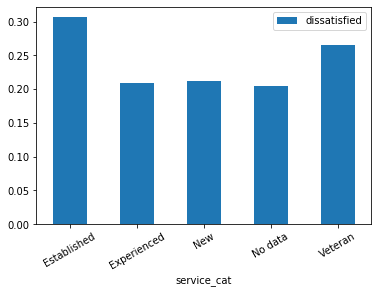

In [238]:
pv_dissatisfied.plot(kind = 'bar', rot=30)